In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
pe = pd.read_csv('/Users/Albert/Desktop/County_PriceToRentRatio_AllHomes.csv')
pe

RegionID      RegionName State                           Metro  \
0         3101     Los Angeles    CA  Los Angeles-Long Beach-Anaheim   
1          139            Cook    IL                         Chicago   
2         2402        Maricopa    AZ                         Phoenix   
3         2841       San Diego    CA                       San Diego   
4         1286          Orange    CA  Los Angeles-Long Beach-Anaheim   
5          581           Kings    NY                        New York   
6         2964      Miami-Dade    FL           Miami-Fort Lauderdale   
7          978          Dallas    TX               Dallas-Fort Worth   
8         1347          Queens    NY                        New York   
9         2832       Riverside    CA                       Riverside   
10        3250  San Bernardino    CA                       Riverside   
11         445           Clark    NV                       Las Vegas   
12         207            King    WA                         Seattle   
13         791           Wayne    MI                         Detroit   
14        2049         Tarrant    TX               Dallas-Fort Worth   
15        3136     Santa Clara    CA                        San Jose   
16        1561         Broward    FL           Miami-Fort Lauderdale   
17        2452        New York    NY                        New York   
18        3175    Philadelphia    PA                    Philadelphia   
19        1510         Alameda    CA                   San Francisco   
20        2801       Middlesex    MA                          Boston   
21        2046         Suffolk    NY                        New York   
22        3017      Sacramento    CA                      Sacramento   
23        1252          Nassau    NY                        New York   
24        2993      Palm Beach    FL           Miami-Fort Lauderdale   
25        2241        Cuyahoga    OH                       Cleveland   
26        3165    Hillsborough    FL                           Tampa   
27        2614       Allegheny    PA                      Pittsburgh   
28        1950         Oakland    MI                         Detroit   
29        2288        Franklin    OH                        Columbus   
...        ...             ...   ...                             ...   
1680       634           Meade    KS                             NaN   
1681       539           Grant    OK                             NaN   
1682      2555        Stafford    KS                             NaN   
1683       665           Ouray    CO                             NaN   
1684      1320          Pierce    ND                             NaN   
1685      1282          Oneida    ID                             NaN   
1686      1764         Haskell    KS                             NaN   
1687      1130          Kearny    KS                     Garden City   
1688       355           Adams    ID                             NaN   
1689      1956         Osborne    KS                             NaN   
1690       722           Smith    KS                             NaN   
1691       596           Lewis    ID                             NaN   
1692      1839         Kimball    NE                             NaN   
1693      2899      Chautauqua    KS                             NaN   
1694      3143     Sweet Grass    MT                             NaN   
1695      1137          Kinney    TX                             NaN   
1696      1005          Emmons    ND                             NaN   
1697      2103         Woodson    KS                             NaN   
1698       311            Rush    KS                             NaN   
1699      1867         Lincoln    KS                             NaN   
1700      1125          Jewell    KS                             NaN   
1701      1687         Edwards    KS                             NaN   
1702      1665         Decatur    KS                             NaN   
1703        71             Elk    KS          

In [3]:
pe['Aggregator'] = 1
pe_series = (pe.groupby(['Aggregator']).mean()).iloc[0,4:-1]
pe_series

2010-10    10.112374
2010-11    10.123546
2010-12    10.062255
2011-01    10.076044
2011-02    10.069867
2011-03    10.023559
2011-04    10.002275
2011-05     9.903880
2011-06     9.784312
2011-07     9.738608
2011-08     9.720161
2011-09     9.745247
2011-10     9.783011
2011-11     9.853791
2011-12     9.899086
2012-01     9.947427
2012-02     9.933723
2012-03     9.920278
2012-04     9.915447
2012-05     9.863000
2012-06     9.829816
2012-07     9.824452
2012-08     9.823025
2012-09     9.850082
2012-10     9.877743
2012-11     9.928095
2012-12     9.963648
2013-01    10.014427
2013-02    10.060985
2013-03    10.116046
             ...    
2015-06    10.145313
2015-07    10.114750
2015-08    10.133976
2015-09    10.241301
2015-10    10.323848
2015-11    10.396617
2015-12    10.361385
2016-01    10.284181
2016-02    10.284566
2016-03    10.244873
2016-04    10.250204
2016-05    10.153099
2016-06    10.181052
2016-07    10.211547
2016-08    10.266381
2016-09    10.330912
2016-10    10

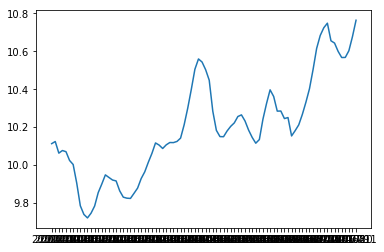

In [4]:
# Create a timeplot with the series data

plt.plot(pe_series)

In [5]:
# Limiting analysis to states of interest: NY, PA, NJ

pe_interests = pe[(pe.State == 'NY')|(pe.State == 'PA')|(pe.State == 'NJ')]
pe_interests.head(20)

RegionID    RegionName State         Metro  StateCodeFIPS  \
5         581         Kings    NY      New York             36   
8        1347        Queens    NY      New York             36   
17       2452      New York    NY      New York             36   
18       3175  Philadelphia    PA  Philadelphia             42   
21       2046       Suffolk    NY      New York             36   
23       1252        Nassau    NY      New York             36   
27       2614     Allegheny    PA    Pittsburgh             42   
40       3148   Westchester    NY      New York             36   
46        157          Erie    NY       Buffalo             36   
50        874        Bergen    NJ      New York             34   
60       2802     Middlesex    NJ      New York             34   
66       2981    Montgomery    PA  Philadelphia             42   
69        504         Essex    NJ      New York             34   
71       1223        Monroe    NY     Rochester             36   
89       1106        Hudson    NJ      New York             34   
90       2441      Monmouth    NJ      New York             34   
93        414         Bucks    PA  Philadelphia             42   
102       659         Ocean    NJ      New York             34   
104      2251      Delaware    PA  Philadelphia             42   
111       771         Union    NJ      New York             34   

     MunicipalCodeFIPS  SizeRank  2010-10  2010-11  2010-12     ...      \
5                   47         6    20.03    19.98    20.25     ...       
8                   81         9    19.35    19.31    19.20     ...       
17                  61        18    19.30    19.39    19.36     ...       
18                 101        19     8.83     8.82     8.92     ...       
21                 103        22    14.51    14.58    13.35     ...       
23                  59        24    14.33    14.29    14.22     ...       
27                   3        28     8.42     8.62     8.91     ...       
40                 119        41    14.01    13.88    13.77     ...       
46                  29        47     8.66     8.70     8.68     ...       
50                   3        51    15.73    15.67    16.06     ...       
60                  23        61    13.21    13.05    12.77     ...       
66                  91        67    13.38    13.43    13.45     ...       
69                  13        70    13.20    13.31    12.72     ...       
71                  55        72    11.17     9.67    10.19     ...       
89                  17        90    14.14    13.89    13.71     ...       
90                  25        91    14.51    14.49    14.42     ...       
93                  17        94    13.39    13.35    13.36     ...       
102                 29       103    13.68    13.43    13.38     ...       
104                 45       105    12.30    12.24    11.80     ...       
111                 39       112    14.82    14.87    14.54     ...       

     2017-04  2017-05  2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
5      23.50    23.89    24.21    24.17    24.26    24.20    24.31    24.43   
8      19.04    19.33    19.44    19.71    20.42    20.83    20.95    21.30   
17     24.16    25.10    25.81    25.89    25.59    25.32    25.64    25.55   
18      9.47     9.50     9.50     9.45     9.48     9.59     9.72     9.84   
21      9.81    10.20     9.86    10.11    10.27    10.49     9.56     9.39   
23     14.01    14.09    14.05    13.91    13.86    13.88    13.97    13.99   
27      9.92     9.84     9.82     9.83     9.94    10.07    10.30    10.38   
40     13.41    13.46    13.29    13.10    13.01    13.07    13.14    13.08   
46      9.36     9.38     9.42     9.41     9.41     9.47     9.64     9.88   
50     15.31    15.46    15.27    15.09    14.93    14.91    14.99    15.16   
60     11.52    11.22    11.22    11.29    11.47    11.56    11.67    11.61   
66     12.64    12.65    12.54    12.44    12.39    12.36    12.43    12.45   
69     14.98   

In [6]:
# Creating column for 6 Month Trailing average

pe_interests['6_Month_Trailing'] = 1

for x in range(129):
    pe_interests.iloc[x,-1] = pe_interests.iloc[x,-9:-2].mean()

/Users/Albert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Albert/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


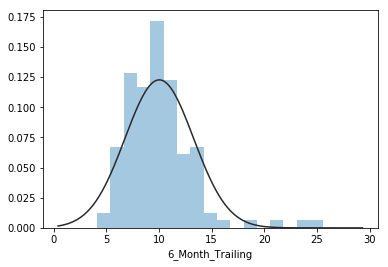

In [7]:
# Create a histogram plotting the 6 Month Trailing average for all counties, and compare it to a normal distribution
trailing_pe = pe_interests['6_Month_Trailing']
sns.distplot(trailing_pe, kde=False, fit=stats.norm)

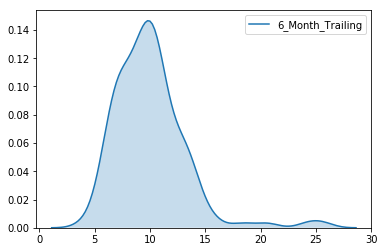

In [8]:
# Seems that the distribution isn't quite normal

sns.kdeplot(trailing_pe, shade=True)

In [9]:
# Hmmm... I wonder which counties have the lowest PE ratios?

mean_pe = pe_interests['6_Month_Trailing'].mean()
value_investments = (pe_interests[pe_interests['6_Month_Trailing'] < mean_pe]).sort_values('6_Month_Trailing').head(20)
value_investments

RegionID      RegionName State         Metro  StateCodeFIPS  \
879       2119        Allegany    NY           NaN             36   
626       3088     Cattaraugus    NY         Olean             36   
845       2287        Franklin    NY        Malone             36   
490       3249  Saint Lawrence    NY    Ogdensburg             36   
858       2186        Chenango    NY           NaN             36   
545       2039         Steuben    NY       Corning             36   
860       2979      Montgomery    NY     Amsterdam             36   
962       1954         Orleans    NY     Rochester             36   
974       2105         Wyoming    NY           NaN             36   
727       2340        Herkimer    NY         Utica             36   
810       2060         Venango    PA      Oil City             42   
462       1296          Oswego    NY      Syracuse             36   
852        748           Tioga    NY    Binghamton             36   
620       1630         Clinton    NY   Plattsburgh             36   
874       2224        Cortland    NY      Cortland             36   
802       1024          Fulton    NY  Gloversville             36   
766       1722         Genesee    NY       Batavia             36   
888       2248        Delaware    NY           NaN             36   
1090      1373          Seneca    NY  Seneca Falls             36   
627        929          Cayuga    NY        Auburn             36   

      MunicipalCodeFIPS  SizeRank  2010-10  2010-11  2010-12  \
879                   3       880     3.53     3.58     3.55   
626                   9       627     4.79     4.83     4.75   
845                  33       846     5.17     5.15     5.26   
490                  89       491     4.43     4.46     4.50   
858                  17       859     5.33     5.40     5.37   
545                 101       546     5.41     5.43     5.32   
860                  57       861     6.21     6.15     6.17   
962                  73       963     5.43     5.40     5.31   
974                 121       975     5.66     5.67     5.60   
727                  43       728     5.58     5.53     5.48   
810                 121       811     4.88     4.91     4.89   
462                  75       463     5.79     5.69     5.66   
852                 107       853     6.65     6.71     6.74   
620                  19       621     6.13     6.12     6.27   
874                  23       875     6.67     6.68     6.65   
802                  35       803     6.67     6.62     6.75   
766                  37       767     6.31     6.26     6.11   
888                  25       889     7.23     7.26     7.27   
1090                 99      1091     5.95     6.00     5.81   
627                  11       628     6.64     6.57     6.51   

            ...         2017-05  2017-06  2017-07  2017-08  2017-09  2017-10  \
879         ...            3.96     3.93     4.11     4.07     4.11     4.14   
626         ...            5.17     5.11     5.10     5.23     5.26     5.28   
845         ...            5.65     5.62     5.60     5.58     5.59     5.59   
490         ...            5.65     5.64     5.64     5.56     5.55     5.61   
858         ...            5.96     5.94     5.77     5.69     5.71     5.71   
545         ...            6.06     6.06     5.79     5.79     5.81     5.87   
860         ...            6.21     6.19     5.97     5.91     5.92     5.94   
962         ...            5.95     5.94     6.01     6.01     6.04     6.11   
974         ...            6.25     6.35     6.20     6.18     6.17     6.20   
727         ...            6.24     6.43     6.42     6.25     6.24     6.27   
810         ...            6.46     6.41     6.26     6.32     6.42     6.49   
462         ...            6.32     6.36     6.31     6.26     6.27     6.53   
852         ...            6.75     6.62     6.60     6.55     6.59     6.59   
620         ...            6.58     6.59     6.58     6.57     6.50     6.61   
874        

In [10]:
# How does the timeplot of value investments in the region compare with the country average?

value_investments_timeseries = (value_investments.groupby(['Aggregator']).mean().iloc[0,4:-1])
value_investments_timeseries

2010-10    5.7230
2010-11    5.7210
2010-12    5.6985
2011-01    5.7070
2011-02    5.7085
2011-03    5.7830
2011-04    5.6540
2011-05    5.6620
2011-06    5.5890
2011-07    5.5535
2011-08    5.4935
2011-09    5.4595
2011-10    5.4925
2011-11    5.5820
2011-12    5.5185
2012-01    5.5635
2012-02    5.6200
2012-03    5.5025
2012-04    5.5430
2012-05    5.4745
2012-06    5.4535
2012-07    5.4160
2012-08    5.3735
2012-09    5.4675
2012-10    5.4800
2012-11    5.6355
2012-12    5.3935
2013-01    5.2700
2013-02    5.4215
2013-03    5.3610
            ...  
2015-07    5.4855
2015-08    5.6175
2015-09    5.6880
2015-10    5.7065
2015-11    5.7045
2015-12    5.7915
2016-01    5.6995
2016-02    5.7860
2016-03    5.7440
2016-04    5.7140
2016-05    5.6495
2016-06    5.6385
2016-07    5.6880
2016-08    5.7490
2016-09    5.8680
2016-10    5.9505
2016-11    6.0475
2016-12    6.1600
2017-01    6.2445
2017-02    6.2965
2017-03    6.3025
2017-04    6.2275
2017-05    6.2345
2017-06    6.2265
2017-07   

<function matplotlib.pyplot.show>

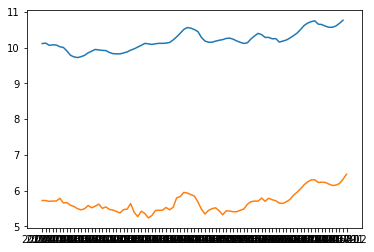

In [11]:
plt.plot(pe_series)
plt.show

plt.plot(value_investments_timeseries)
plt.show

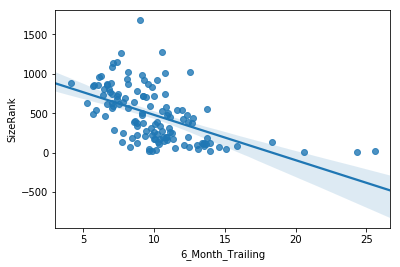

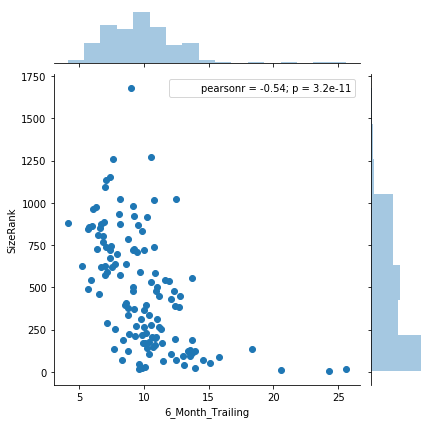

In [24]:
# I wonder how a region's size correlates to the PE ratio. Let's scatter the two and see what we can find.
sizerank = pe_interests['SizeRank']
sns.regplot(x=trailing_pe, y=sizerank, data=pe_interests)
sns.jointplot(x=trailing_pe, y=sizerank, data=pe_interests)

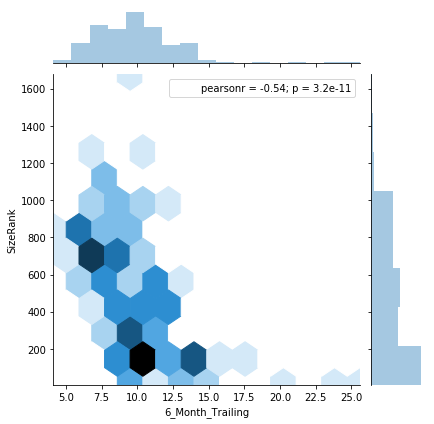

In [13]:
sns.jointplot(x=trailing_pe, y=sizerank, kind='hex', data=pe_interests)

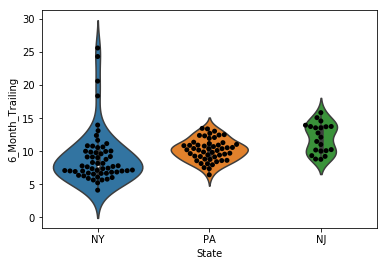

In [22]:
sns.violinplot(x="State", y="6_Month_Trailing", data=pe_interests, bw=.5, scale='count')
sns.swarmplot(x="State", y="6_Month_Trailing", data=pe_interests, color='black');